# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [30]:
import numpy as np

class LinearRegression:
    def __init__(self,learning_rate = 0.01, iterations = 1000):
        self.lr = learning_rate
        self.n_iters = iterations
        self.weights = None
        self.bias = None

    # for fit I have used gradient descent
    def fit(self, X, y):
      y = y.reshape(-1)
      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)
      self.bias = 0

      for _ in range(self.n_iters):
        y_pred = np.dot(X, self.weights) + self.bias

      # now calculate gradients and update the parameters
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
      y_pred = np.dot(X, self.weights) + self.bias
      return y_pred


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression as skLinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/Real estate.csv'
df = pd.read_csv(file_path)

# Part1 - printing the null values
print("The missing values are :\n", data.isnull().sum())

The missing values are :
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


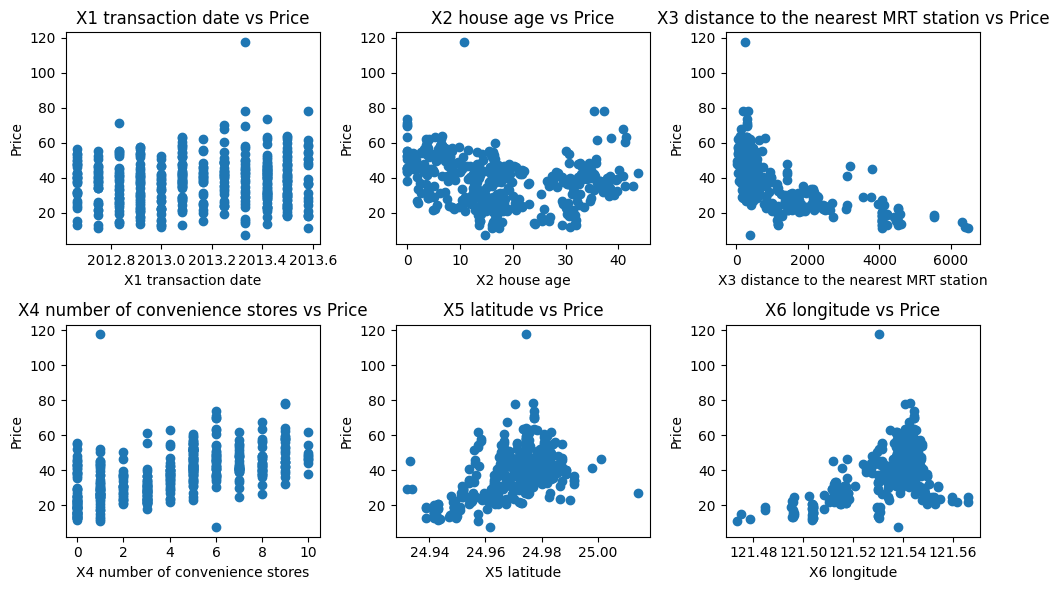

In [20]:
# Plotting curves for column vs price in last coulumn

feautures = df.columns[1:-1]
target = df.columns[-1]

plt.figure(figsize=(10, 6))
for i,col in enumerate(feautures):
  plt.subplot(2,3,i+1)
  plt.scatter(df[col], df[target])
  plt.xlabel(col)
  plt.ylabel("Price")
  plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

In [42]:
# Removing unwanted columns
df_clean = df.drop(df.columns[0],axis = 1)

x = df_clean.iloc[:,:-1].values
y = df_clean.iloc[:, -1].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Training use custom model
print("Training using custom model")
model = LinearRegression(learning_rate=0.1, iterations = 5000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating mse and r2 scores for custom model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The data is for custom model :")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")
# Training use Scikit learn linear model
print("Training using Sklearn Linear Regression model")
sk_model = skLinearRegression()
sk_model.fit(x_train, y_train)
y_pred_sk = sk_model.predict(x_test)

# calculating mse and r2 scores for Scikit model
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("The data is for Scikit model : ")
print(f"Mean Squared Error: {mse_sk}")
print(f"R-squared: {r2_sk}")
print("\n")

print(f"Difference in MSE : {abs(mse - mse_sk):.4f}")
if abs(mse - mse_sk) < 1.0:
  print("Success ! : Error of MSE is less")


Training using custom model
The data is for custom model :
Mean Squared Error: 65.99158048969942
R-squared: 0.5839606669655041


Training using Sklearn Linear Regression model
The data is for Scikit model : 
Mean Squared Error: 66.67336271835958
R-squared: 0.5796624182861772


Difference in MSE : 0.6818
Success ! : Error of MSE is less


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data  = load_breast_cancer()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f"Training Data Shape : {x_train.shape}")
print(f"Testing Data Shape : {x_test.shape}")


Training Data Shape : (455, 30)
Testing Data Shape : (114, 30)


5. Write code for the sigmoid function and Logistic regression.


In [50]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)


            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [52]:
from sklearn.metrics import accuracy_score

print("Training on Custom Model:")
model = LogisticRegression(learning_rate=0.01, epochs=2000)
model.fit(x_train, y_train)
custom_predictions = model.predict(x_test).round()
accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom model accuracy : {accuracy:.4f}")
print("\n")

print("Training on Sklearn Models :")

configs = [
    {'name': 'L2 (Ridge)',   'penalty': 'l2',         'solver': 'liblinear', 'l1_ratio': None},
    {'name': 'L1 (Lasso)',   'penalty': 'l1',         'solver': 'liblinear', 'l1_ratio': None},
    {'name': 'ElasticNet',   'penalty': 'elasticnet', 'solver': 'saga',      'l1_ratio': 0.5},
    {'name': 'No Penalty',   'penalty': None,         'solver': 'lbfgs',     'l1_ratio': None}
]

best_accuracy = 0
best_model = None
best_name = ""
best_pred = None

for config in configs:
  model = SklearnLR(penalty=config['penalty'], solver=config['solver'],
                      l1_ratio=config['l1_ratio'], max_iter=5000)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{config['name']} accuracy : {accuracy:.4f}")

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_name = config['name']
    best_pred = y_pred

Training on Custom Model:
Custom model accuracy : 0.9912


Training on Sklearn Models :
L2 (Ridge) accuracy : 0.9737
L1 (Lasso) accuracy : 0.9737
ElasticNet accuracy : 0.9737
No Penalty accuracy : 0.9386


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [55]:
# Report for custom model
print("Custom Model report")
print("\n")
print("Classification Report : ")
print(classification_report(y_test, custom_predictions))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, custom_predictions))
print("\n")

# Best Sklearn model
print("\nBest Sklearn Model report")
print("\n")
print("Classification Report : ")
print(classification_report(y_test, best_pred))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, best_pred))

Custom Model report


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix : 
[[42  1]
 [ 0 71]]



Best Sklearn Model report


Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix : 
[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/content/glass.csv'
df = pd.read_csv(file_path)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")


Training set size: 171
Testing set size: 43


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [66]:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) **2))

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print("Training KNN Model ")
model = KNN(k=3)
model.fit(x_train, y_train)
print("Model Fitted Successfully")

Training KNN Model 
Model Fitted Successfully


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [68]:
# I tried for k = 3,5,7,9 and in
# here also k = 3 gave the best results

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

print("Training Custom model")
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Training Sklearn model")
sk_model = KNeighborsClassifier(n_neighbors=3)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
sk_accuracy = accuracy_score(y_test,sk_pred)

print(f"Custom model accuracy : {accuracy:.4f}")
print(f"Sklearn model accuracy : {sk_accuracy:.4f}")
if(accuracy > sk_accuracy):
  print("Custom model is better")
elif(accuracy < sk_accuracy):
  print("Sklearn model is better")
else :
  print("Both are equal")


Training Custom model
Training Sklearn model
Custom model accuracy : 0.7442
Sklearn model accuracy : 0.7442
Both are equal
